In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('adult.csv')

In [3]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
df = df.replace('?', np.NaN)
df.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [6]:
df = df.dropna(axis=0)
df.reset_index(drop=True, inplace=True)
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [7]:
df['income'].value_counts(normalize=True)

<=50K    0.752156
>50K     0.247844
Name: income, dtype: float64

In [8]:
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1})

In [9]:
df['income'].value_counts(normalize=True)

0    0.752156
1    0.247844
Name: income, dtype: float64

In [10]:
df_str = df.select_dtypes(include='object')
df_int = df.select_dtypes(exclude='object')

In [11]:
df_str.describe(include='all')

,workclass,education,marital-status,occupation,relationship,race,gender,native-country
count,45222,45222,45222,45222,45222,45222,45222,45222
unique,7,16,7,14,6,5,2,41
top,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States
freq,33307,14783,21055,6020,18666,38903,30527,41292


In [12]:
df_str.head()

,workclass,education,marital-status,occupation,relationship,race,gender,native-country
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States
4,Private,10th,Never-married,Other-service,Not-in-family,White,Male,United-States


In [13]:
df_int.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income
0,25,226802,7,0,0,40,0
1,38,89814,9,0,0,50,0
2,28,336951,12,0,0,40,1
3,44,160323,10,7688,0,40,1
4,34,198693,6,0,0,30,0


In [14]:
df_str = pd.get_dummies(df_str)

In [15]:
df_str.head()

,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,education_11th,education_12th,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


## Part 2

/Users/abdiiputra/miniconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


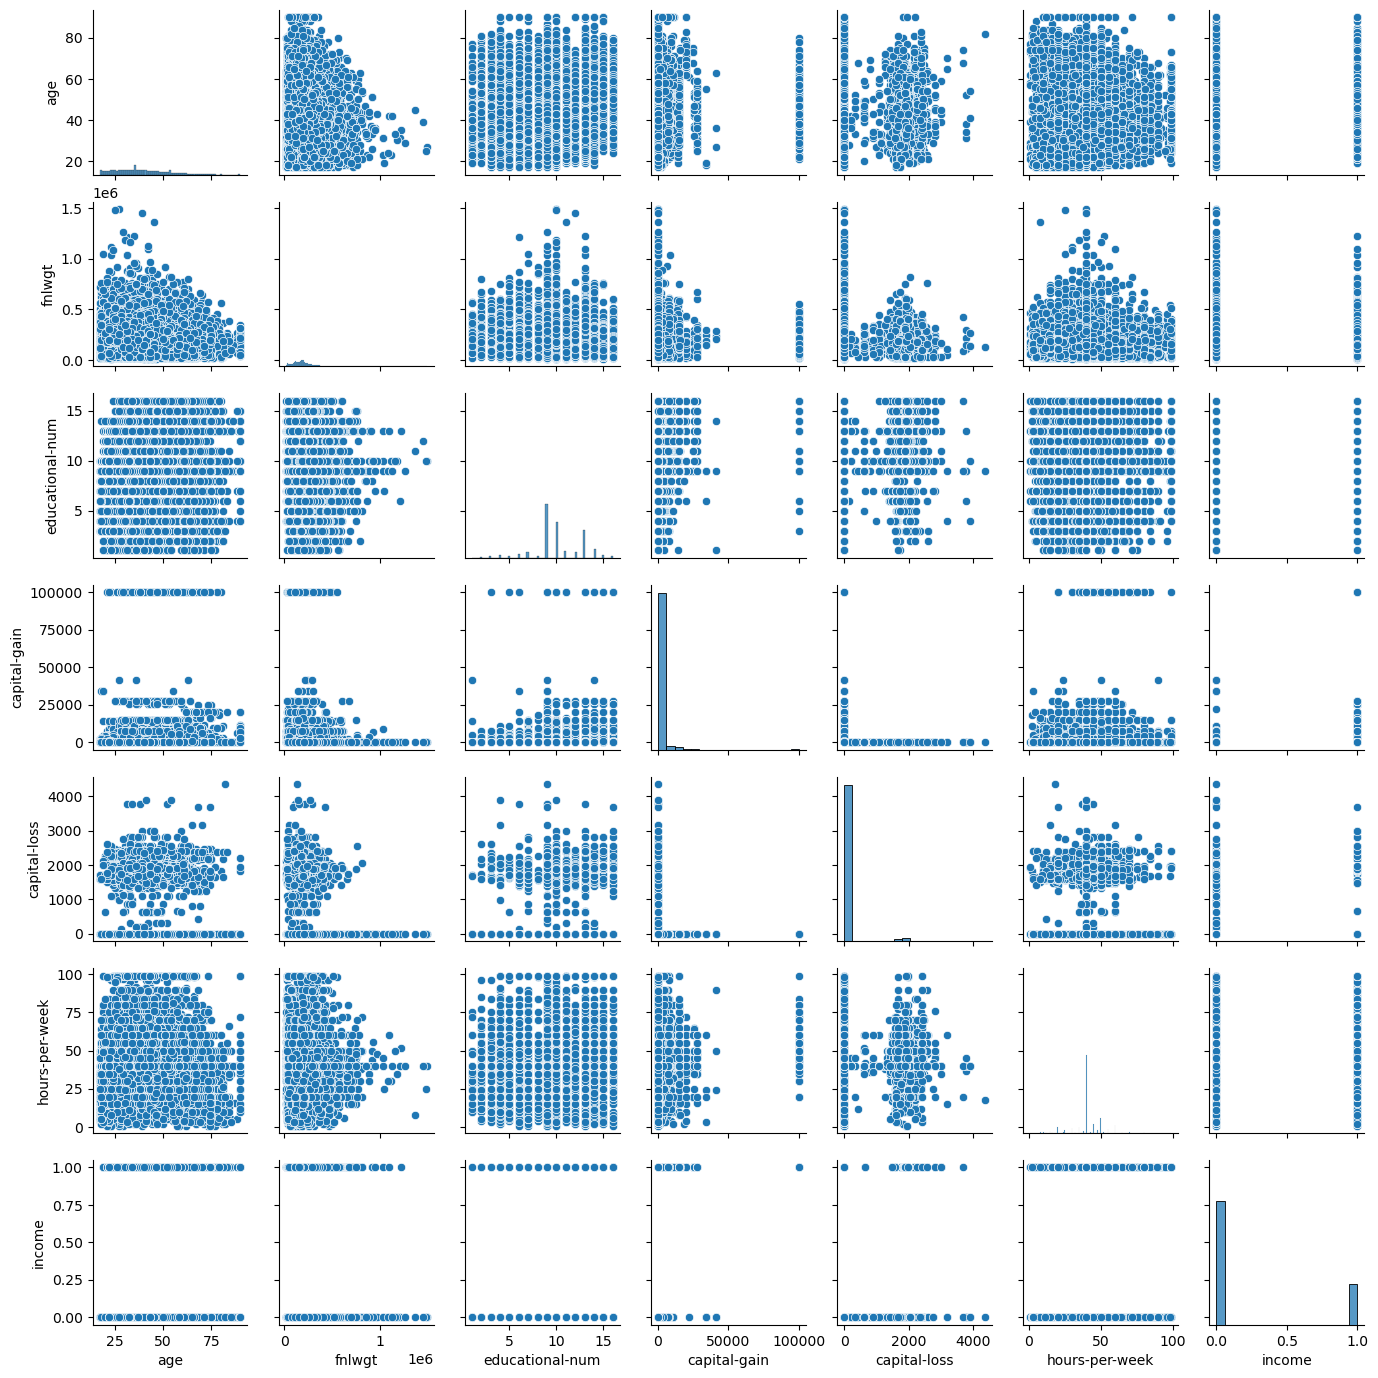

In [17]:
from IPython.display import Image
import seaborn as sns
import matplotlib.pyplot as plt 

sns_plot = sns.pairplot(df, size=2.0)
sns_plot.savefig("pairplot.png")

plt.clf() # Clean parirplot figure from sns 
Image(filename='pairplot.png') # Show pairplot as image

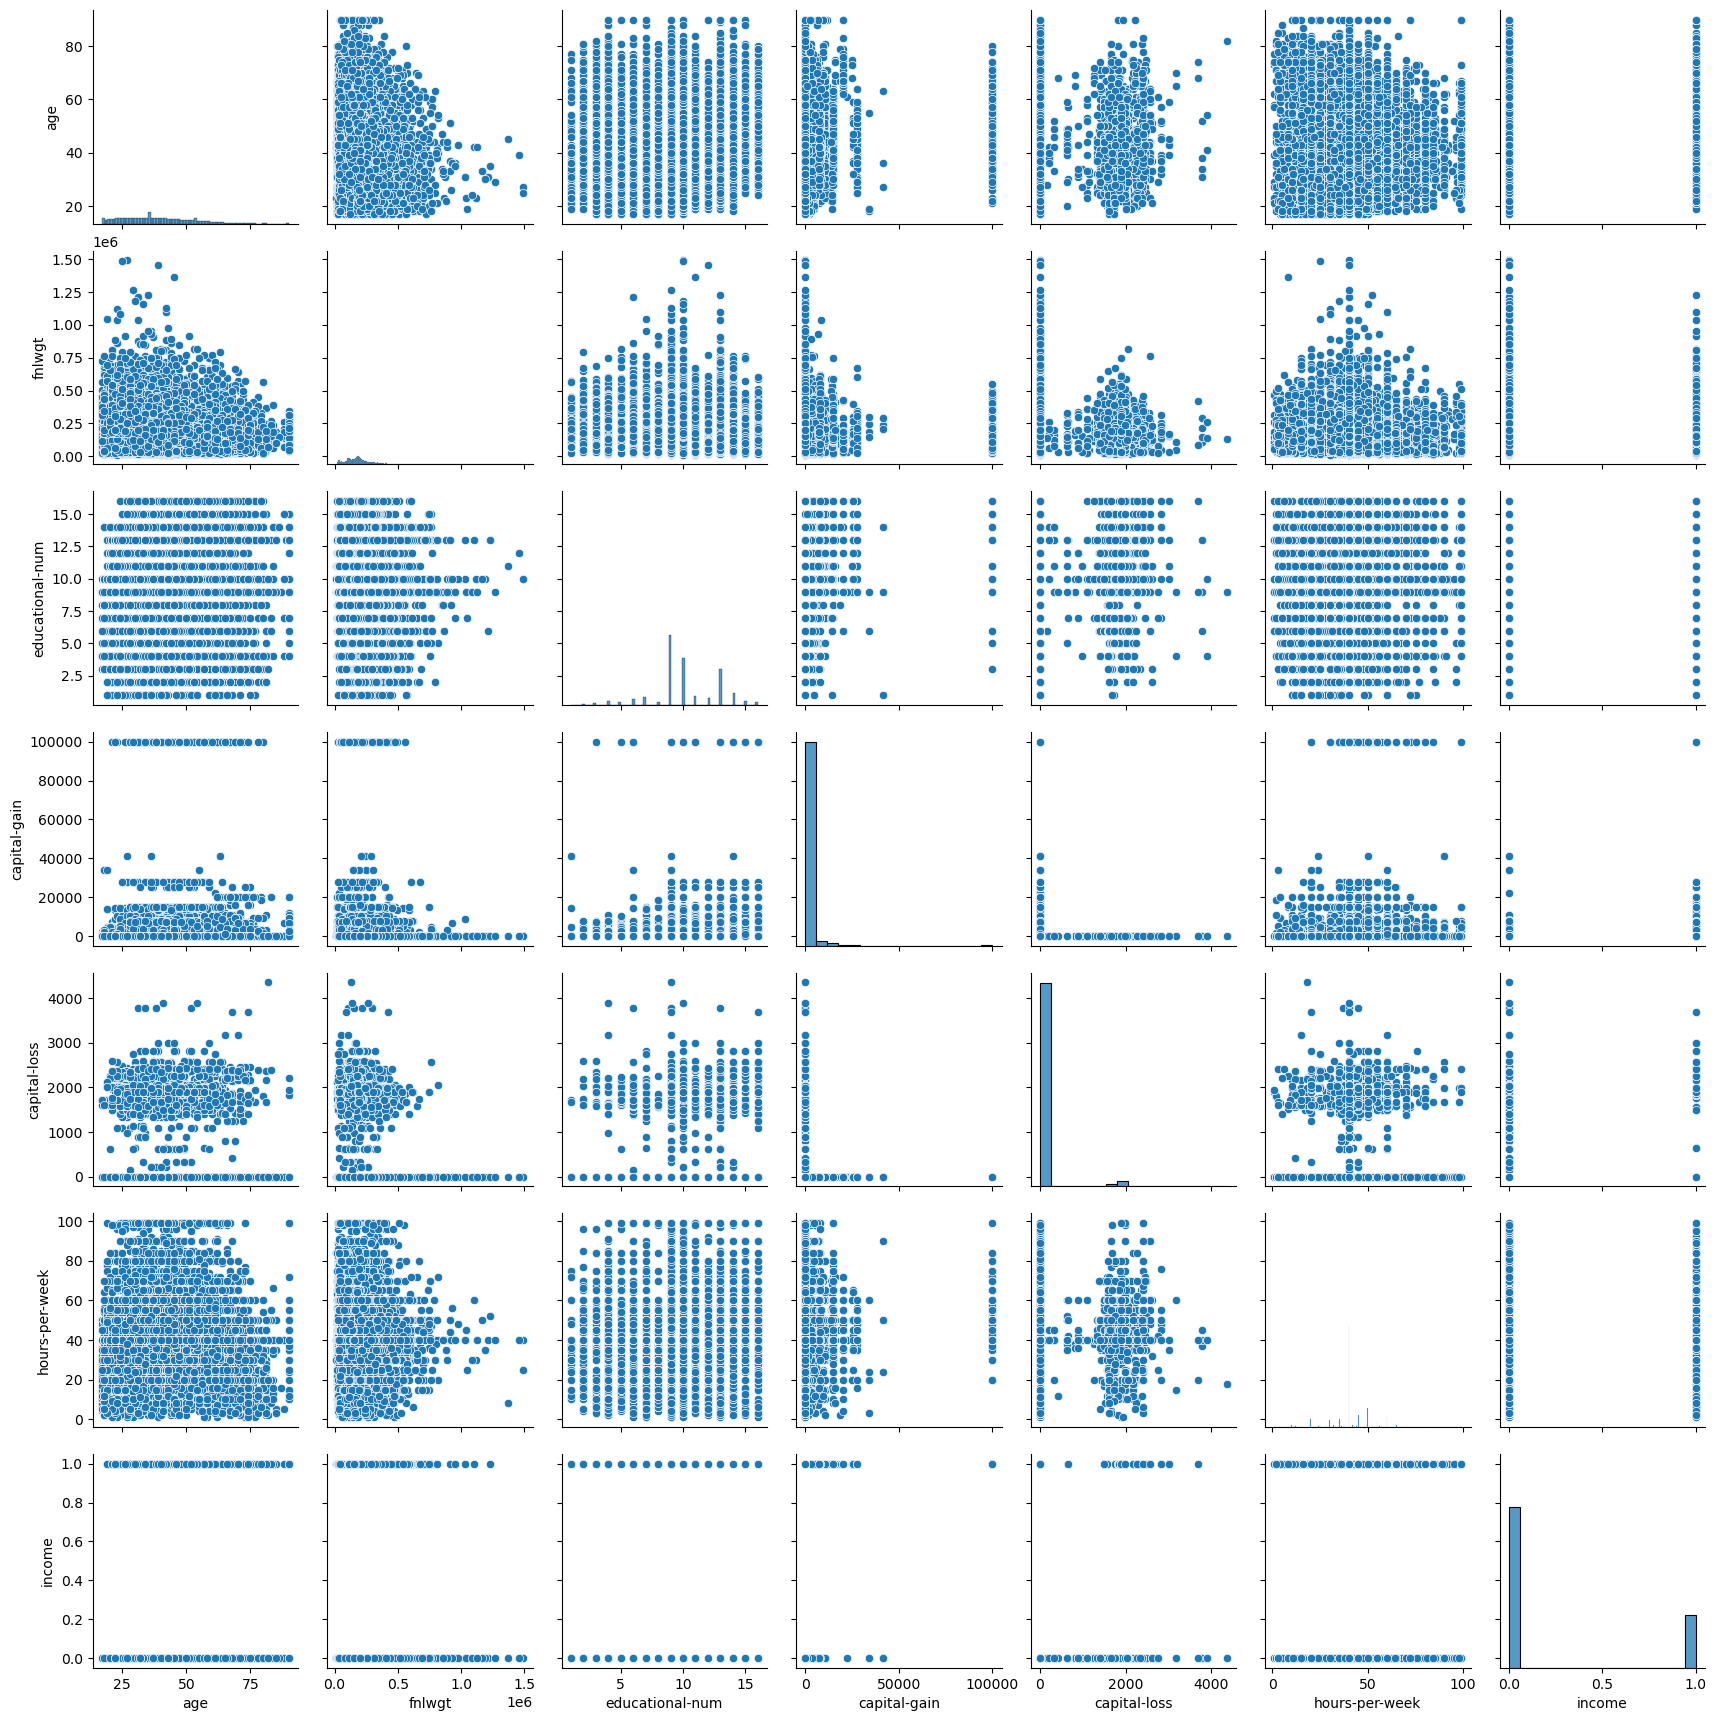

In [18]:
sns.pairplot(df_int)

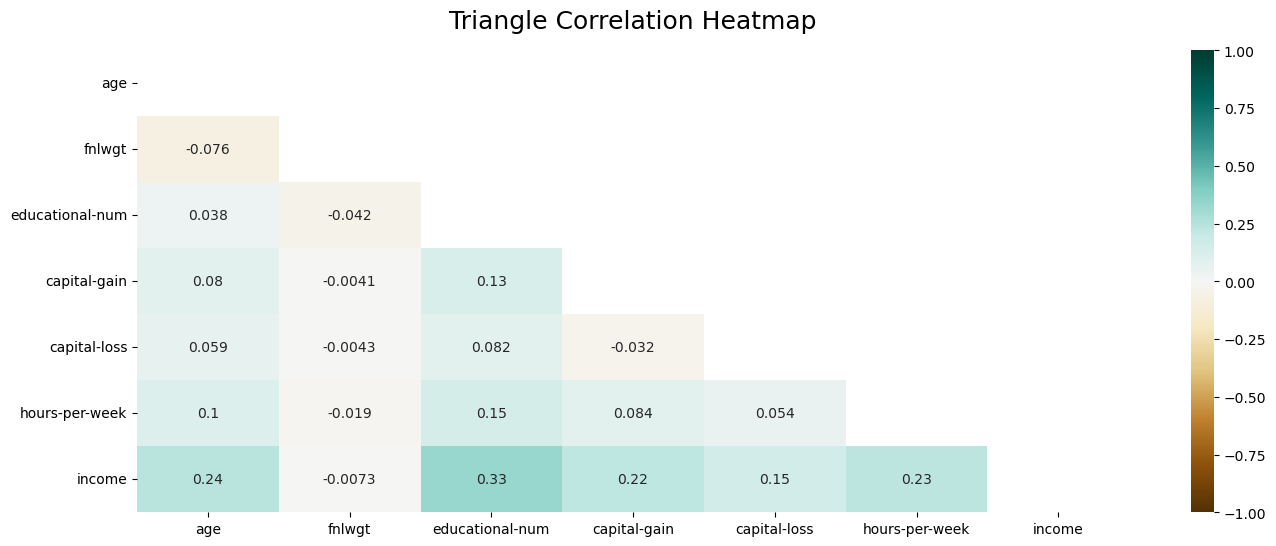

In [20]:
plt.figure(figsize=(16,6))
mask = np.triu(np.ones_like(df_int.corr(), dtype=bool))
heatmap = sns.heatmap(df_int.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

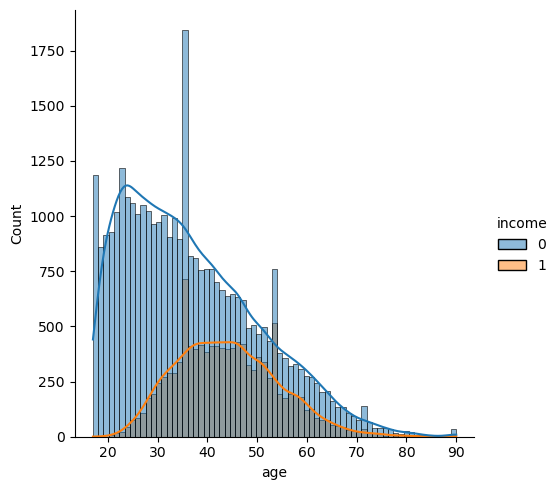

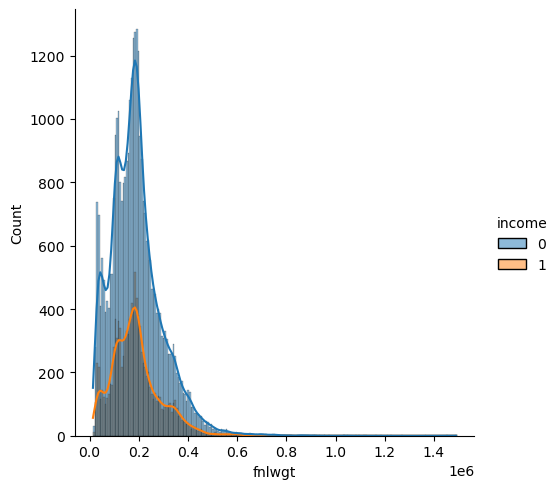

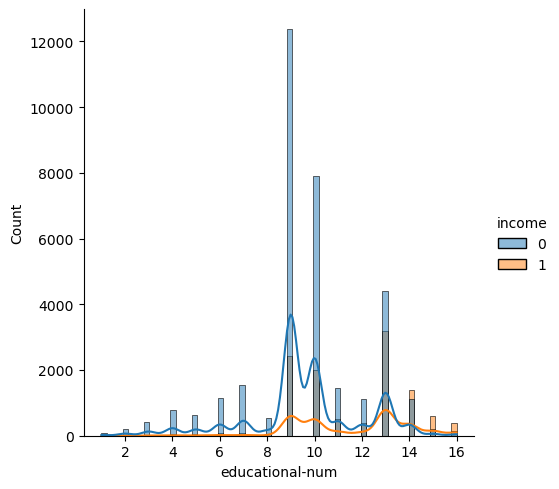

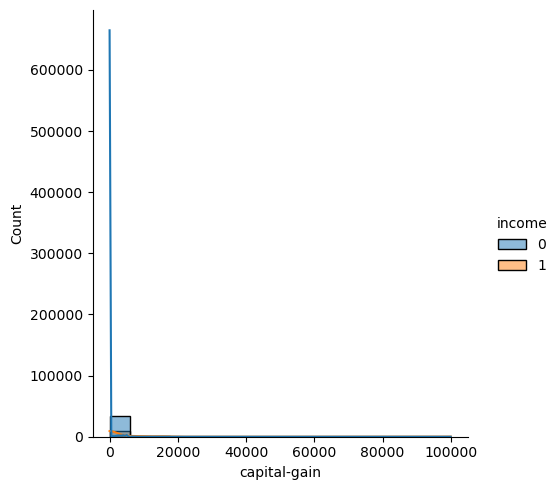

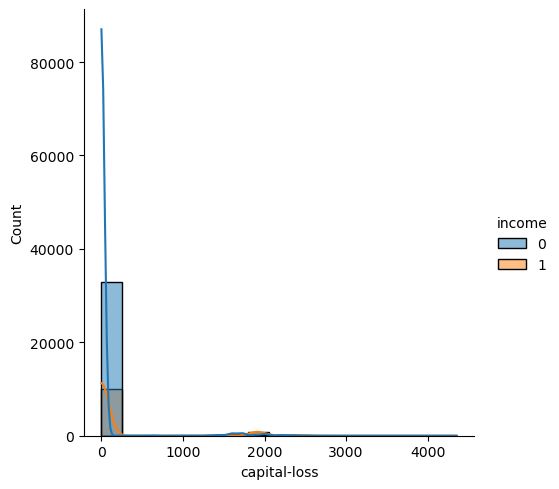

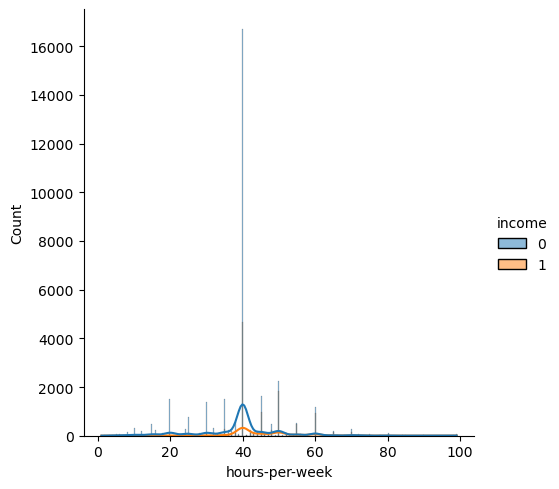

In [21]:
for column in df_int.columns.to_list():
    if column != 'income':
        sns.displot(x=column, hue='income', data=df_int, kde=True)

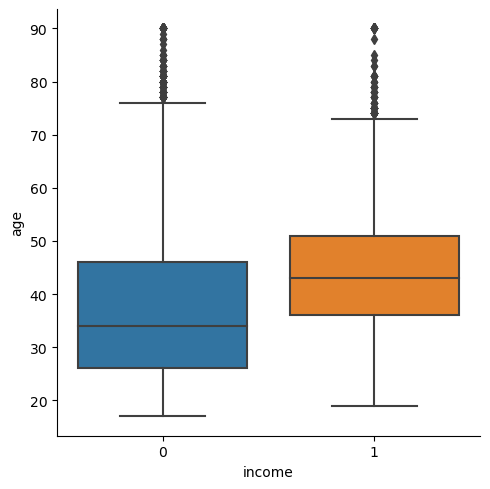

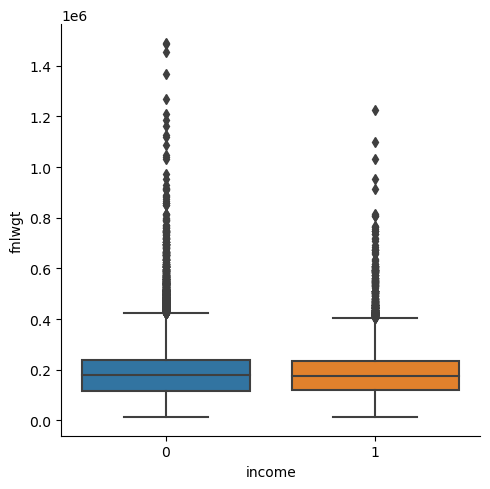

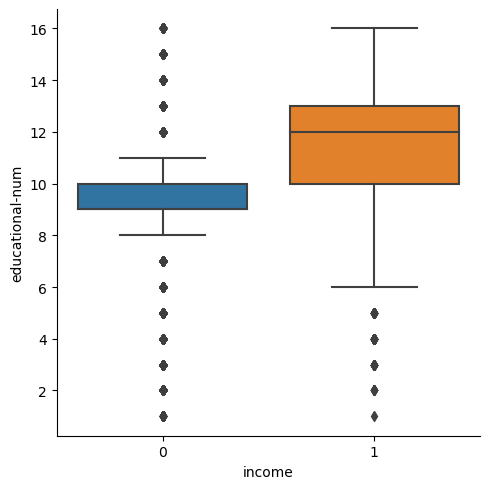

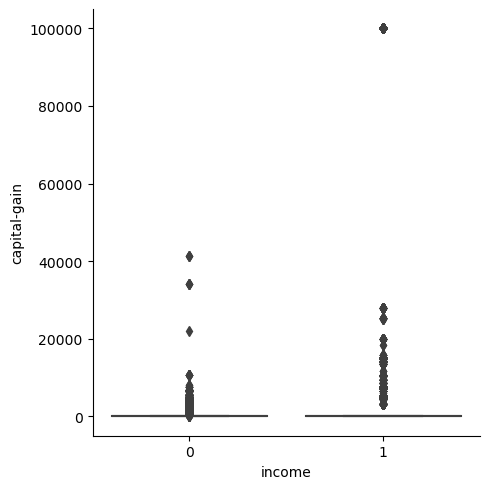

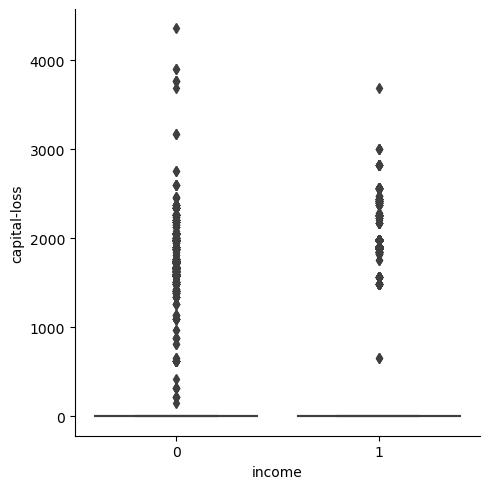

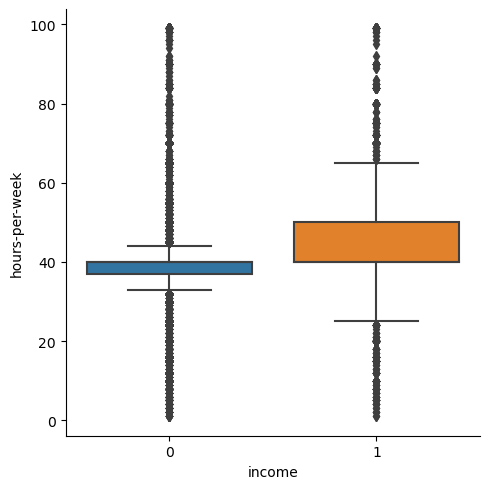

In [22]:
for column in df_int.columns.to_list():
    if column != 'income':
        sns.catplot(x='income', y=column, kind='box', data=df_int)

## Part 3 : Standart Scalling / Max-Min Scalling

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
y = df_int['income']
x = df_int.drop(columns='income')
column_names = x.columns.to_list()

In [25]:
ss = StandardScaler()

x = ss.fit_transform(x)

In [26]:
x = pd.DataFrame(x)
x.columns = column_names
x.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
0,-1.024983,0.350889,-1.221559,-0.146733,-0.21878,-0.078120
1,-0.041455,-0.945878,-0.438122,-0.146733,-0.21878,0.754701
2,-0.798015,1.393592,0.737034,-0.146733,-0.21878,-0.078120
3,0.412481,-0.278420,-0.046403,0.877467,-0.21878,-0.078120
4,-0.344079,0.084802,-1.613277,-0.146733,-0.21878,-0.910942


In [27]:
x = pd.concat([x, df_str], axis=1)
x.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,-1.024983,0.350889,-1.221559,-0.146733,-0.21878,-0.078120,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,-0.041455,-0.945878,-0.438122,-0.146733,-0.21878,0.754701,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,-0.798015,1.393592,0.737034,-0.146733,-0.21878,-0.078120,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.412481,-0.278420,-0.046403,0.877467,-0.21878,-0.078120,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,-0.344079,0.084802,-1.613277,-0.146733,-0.21878,-0.910942,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


## Part 4 : Training and Modeling

In [28]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)

In [29]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier().fit(x_train, y_train)

In [30]:
y_pred = knn.predict(x_test)

In [31]:
from sklearn.metrics import accuracy_score

In [32]:
accuracy_score(y_test, y_pred)

0.8233950025797891

## Part 5 : Choosing the best K value

In [33]:
error_rate = []

for i in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

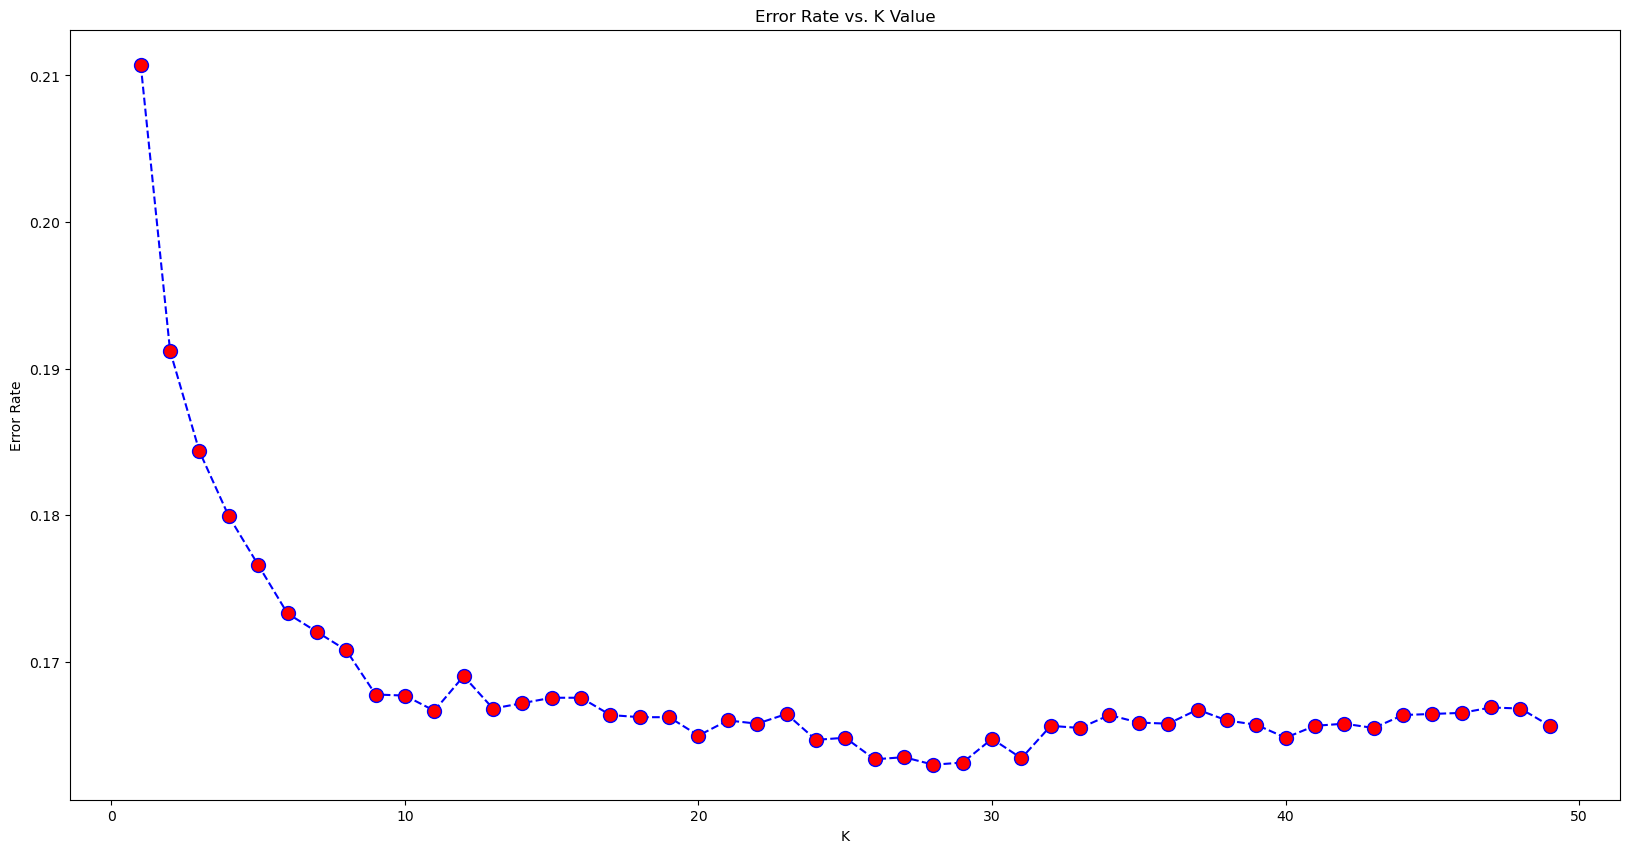

In [34]:
plt.figure(figsize=(20,10))
plt.plot(range(1,50), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate');

##Part 6 : Retrain the model with new K value

In [35]:
knn = KNeighborsClassifier(n_neighbors=29)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)

In [36]:
accuracy_score(y_test, pred)

0.8368836146532026

In [41]:
from sklearn.metrics import classification_report

In [42]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89     10205
           1       0.70      0.60      0.64      3362

    accuracy                           0.84     13567
   macro avg       0.79      0.76      0.77     13567
weighted avg       0.83      0.84      0.83     13567

